In [1]:
%cd /content
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jinn0135/temp-sign


/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 99% 238M/240M [00:02<00:00, 132MB/s] 
100% 240M/240M [00:02<00:00, 111MB/s]


In [2]:
!unzip -q temp-sign.zip -d temp-sign/ 
root = '/content/temp_sign/Temp/'

In [3]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'|
!mim install 'mmdet>=3.0.0rc0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 23.8 MB/s eta 0:00:00
/bin/bash: -c: line 1: syntax error: unexpected end of file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 6.2 MB/s eta 0:00:00


In [4]:
import mmcv
import matplotlib.pyplot as plt


In [5]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

Cloning into 'mmocr'...
remote: Enumerating objects: 16277, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 16277 (delta 56), reused 138 (delta 42), pack-reused 16089
Receiving objects: 100% (16277/16277), 16.19 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (10722/10722), done.
/content/mmocr
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmocr
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info
  writing /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-_b11qs8k/mmocr.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-_b11q

In [6]:
from mmocr.datasets import OCRDataset
from mmengine.registry import init_default_scope
from mmocr.apis import MMOCRInferencer
from mmengine.runner import Runner
import time
import mmcv
import matplotlib.pyplot as plt

In [33]:
from mmengine import Config
cfg = Config.fromfile('/content/mmocr/configs/textdet/dbnet/dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015.py')

In [34]:
cfg.keys()

dict_keys(['model', 'train_pipeline', 'test_pipeline', 'icdar2015_textdet_data_root', 'icdar2015_textdet_train', 'icdar2015_textdet_test', 'default_scope', 'env_cfg', 'randomness', 'default_hooks', 'log_level', 'log_processor', 'load_from', 'resume', 'val_evaluator', 'test_evaluator', 'vis_backends', 'visualizer', 'optim_wrapper', 'train_cfg', 'val_cfg', 'test_cfg', 'param_scheduler', 'train_dataloader', 'val_dataloader', 'test_dataloader', 'auto_scale_lr'])

In [39]:
cfg.optim_wrapper

{'type': 'OptimWrapper',
 'optimizer': {'type': 'SGD',
  'lr': 0.0007,
  'momentum': 0.9,
  'weight_decay': 0.0001}}

In [38]:
cfg.optim_wrapper.optimizer.lr = 0.0007

In [9]:
#cfg.param_scheduler[1] = {'type': 'MultiStepLR', 'milestones': [5,7], 'end': 10}

In [13]:
cfg.train_cfg

{'type': 'EpochBasedTrainLoop', 'max_epochs': 10, 'val_interval': 20}

In [31]:
#cfg.param_scheduler[0]/content/mmocr/configs/textdet/dbnetpp/dbnetpp_resnet50-dcnv2_fpnc_1200e_icdar2015.py

{'type': 'LinearLR', 'end': 500, 'start_factor': 0.001, 'by_epoch': False}

In [148]:
#cfg.optim_wrapper.optimizer.lr = 0.0001

In [40]:
cfg.optim_wrapper.optimizer

{'type': 'SGD', 'lr': 0.0007, 'momentum': 0.9, 'weight_decay': 0.0001}

In [10]:
# cfg.train_pipeline = [{'type': 'LoadImageFromFile', 'color_type': 'color_ignore_orientation'},
#  {'type': 'LoadOCRAnnotations',
#   'with_polygon': True,
#   'with_bbox': True,
#   'with_label': True},
#  {'type': 'TorchVisionWrapper',
#   'op': 'ColorJitter',
#   'brightness': 0.12549019607843137,
#   'saturation': 0.5,
#   'contrast': 0.5},
#  {'type': 'RandomResize',
#   'scale': (640, 640),
#   'ratio_range': (1.0, 4.125),
#   'keep_ratio': True},
#  {'type': 'RandomFlip', 'prob': 0.8},
#  {'type': 'TextDetRandomCrop', 'target_size': (640, 640)},
#  {'type': 'MMOCR2MMDet', 'poly2mask': True},
#  {'type': 'mmdet.PackDetInputs',
#   'meta_keys': ('img_path',
#    'ori_shape',
#    'img_shape',
#    'flip',
#    'scale_factor',
#    'flip_direction')}]

In [42]:
cfg.work_dir = 'work_dirs/test/'

In [41]:
cfg.train_cfg.max_epochs = 10

In [131]:
#cfg.train_dataloader.batch_size = 5

In [43]:
data_root = '/content/temp-sign/kaggle_ko_sign/Temp/'

In [15]:
cfg.icdar2015_textdet_train

{'type': 'OCRDataset',
 'data_root': 'data/icdar2015',
 'ann_file': 'textdet_train.json',
 'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
 'pipeline': [{'type': 'LoadImageFromFile',
   'color_type': 'color_ignore_orientation'},
  {'type': 'LoadOCRAnnotations',
   'with_polygon': True,
   'with_bbox': True,
   'with_label': True},
  {'type': 'ShortScaleAspectJitter', 'short_size': 736, 'scale_divisor': 32},
  {'type': 'RandomFlip', 'prob': 0.5, 'direction': 'horizontal'},
  {'type': 'RandomRotate', 'max_angle': 10},
  {'type': 'TextDetRandomCrop', 'target_size': (736, 736)},
  {'type': 'Pad', 'size': (736, 736)},
  {'type': 'TorchVisionWrapper',
   'op': 'ColorJitter',
   'brightness': 0.12549019607843137,
   'saturation': 0.5},
  {'type': 'PackTextDetInputs',
   'meta_keys': ('img_path', 'ori_shape', 'img_shape', 'scale_factor')}]}

In [44]:
cfg.icdar2015_textdet_data_root = data_root + 'temp_Sign'

In [45]:
cfg.icdar2015_textdet_train.data_root = data_root + 'temp_Sign'
cfg.icdar2015_textdet_train.ann_file = data_root + 'temp_train_annotation.json'

In [46]:
cfg.icdar2015_textdet_test.data_root = data_root + 'temp_Sign'
cfg.icdar2015_textdet_test.ann_file = data_root + 'temp_test_annotation.json'

In [19]:
cfg.test_dataloader

{'batch_size': 1,
 'num_workers': 4,
 'persistent_workers': True,
 'sampler': {'type': 'DefaultSampler', 'shuffle': False},
 'dataset': {'type': 'OCRDataset',
  'data_root': 'data/icdar2015',
  'ann_file': 'textdet_test.json',
  'test_mode': True,
  'pipeline': [{'type': 'LoadImageFromFile',
    'color_type': 'color_ignore_orientation'},
   {'type': 'ShortScaleAspectJitter',
    'short_size': 736,
    'scale_divisor': 1,
    'ratio_range': (1.0, 1.0),
    'aspect_ratio_range': (1.0, 1.0)},
   {'type': 'LoadOCRAnnotations',
    'with_polygon': True,
    'with_bbox': True,
    'with_label': True},
   {'type': 'PackTextDetInputs',
    'meta_keys': ('img_path', 'ori_shape', 'img_shape', 'scale_factor')}]}}

In [47]:
cfg.train_dataloader.num_workers = 1
cfg.train_dataloader.batch_size = 5
cfg.train_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.train_dataloader.dataset.ann_file = data_root + 'temp_train_annotation.json'

In [48]:
cfg.test_dataloader.num_workers = 1
cfg.test_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.test_dataloader.dataset.ann_file = data_root + 'temp_test_annotation.json'

In [49]:
cfg.val_dataloader.num_workers = 1
cfg.val_dataloader.dataset.data_root = data_root + 'temp_Sign'
cfg.val_dataloader.dataset.ann_file = data_root + 'temp_test_annotation.json'

In [161]:
cfg.train_dataloader.dataset.datasets = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_train_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [162]:
cfg.val_dataloader.dataset.datasets = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_test_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [163]:
cfg.test_dataloader.dataset.datasets = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_test_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [164]:
cfg.train_list = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_train_annotation.json',
  'filter_cfg': {'filter_empty_gt': True, 'min_size': 32},
  'pipeline': None}]

In [165]:
cfg.test_list = [{'type': 'OCRDataset',
  'data_root': '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign',
  'ann_file': '/content/temp-sign/kaggle_ko_sign/Temp/temp_test_annotation.json',
  'test_mode': True,
  'pipeline': None}]

In [94]:
# cfg.train_dataloader.dataset.data_prefix.img_path = ''
# cfg.val_dataloader.dataset.data_prefix.img_path = ''
# cfg.test_dataloader.dataset.data_prefix.img_path = ''


In [ ]:
cfg.icdar2015_textdet_train

In [53]:
cfg.train_dataloader.keys()

dict_keys(['batch_size', 'num_workers', 'persistent_workers', 'sampler', 'dataset'])

In [115]:
cfg.train_cfg.type

'EpochBasedTrainLoop'

In [50]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)
runner.train()

05/18 08:38:07 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1188861252
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmocr.visualization.textdet_visualizer.TextDetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


05/18 08:38:08 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/18 08:38:08 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

Downloading: "https://download.openmmlab.com/mmocr/textdet/dbnet/tmp_1.0_pretrain/dbnet_r50dcnv2_fpnc_sbn_2e_synthtext_20210325-ed322016.pth" to /root/.cache/torch/hub/checkpoints/dbnet_r50dcnv2_fpnc_sbn_2e_synthtext_20210325-ed322016.pth


05/18 08:38:31 - mmengine - INFO - Load checkpoint from https://download.openmmlab.com/mmocr/textdet/dbnet/tmp_1.0_pretrain/dbnet_r50dcnv2_fpnc_sbn_2e_synthtext_20210325-ed322016.pth
05/18 08:38:31 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
05/18 08:38:31 - mmengine - INFO - Checkpoints will be saved to /content/work_dirs/test.
05/18 08:38:39 - mmengine - INFO - Epoch(train)  [1][  5/160]  lr: 7.0000e-04  eta: 0:39:45  time: 1.4953  data_time: 0.6240  memory: 4876  loss: 9.7175  loss_prob: 7.2232  loss_thr: 1.6799  loss_db: 0.8144
05/18 08:38:46 - mmengine - INFO - Epoch(train)  [1][ 10/160]  lr: 7.0000e-04  eta: 0:40:14  time: 1.5184  data_time: 0.6479  memory: 4876  loss: 7.4735  loss_prob: 5.3738  loss_thr: 1.4175  loss_db: 0.6822


/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:38:54 - mmengine - INFO - Epoch(train)  [1][ 15/160]  lr: 7.0000e-04  eta: 0:39:26  time: 1.4915  data_time: 0.6367  memory: 4876  loss: 5.0712  loss_prob: 3.3574  loss_thr: 1.1316  loss_db: 0.5821
05/18 08:39:01 - mmengine - INFO - Epoch(train)  [1][ 20/160]  lr: 7.0000e-04  eta: 0:39:22  time: 1.4718  data_time: 0.6198  memory: 4876  loss: 4.5851  loss_prob: 2.9762  loss_thr: 1.0555  loss_db: 0.5534
05/18 08:39:09 - mmengine - INFO - Epoch(train)  [1][ 25/160]  lr: 7.0000e-04  eta: 0:39:10  time: 1.4911  data_time: 0.6192  memory: 4876  loss: 4.3397  loss_prob: 2.8367  loss_thr: 0.9924  loss_db: 0.5106
05/18 08:39:16 - mmengine - INFO - Epoch(train)  [1][ 30/160]  lr: 7.0000e-04  eta: 0:38:35  time: 1.4348  data_time: 0.5779  memory: 4876  loss: 4.3088  loss_prob: 2.8373  loss_thr: 0.9734  loss_db: 0.4981
05/18 08:39:24 - mmengine - INFO - Epoch(train)  [1][ 35/160]  lr: 7.0000e-04  eta: 0:38:59  time: 1.5011  data_time: 0.6364  memory: 4876  loss: 4.1047  loss_prob: 2.6905 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:39:39 - mmengine - INFO - Epoch(train)  [1][ 45/160]  lr: 7.0000e-04  eta: 0:38:55  time: 1.5281  data_time: 0.6587  memory: 4876  loss: 3.4313  loss_prob: 2.1916  loss_thr: 0.8642  loss_db: 0.3756
05/18 08:39:46 - mmengine - INFO - Epoch(train)  [1][ 50/160]  lr: 7.0000e-04  eta: 0:38:34  time: 1.4538  data_time: 0.5763  memory: 4876  loss: 3.6076  loss_prob: 2.2897  loss_thr: 0.9009  loss_db: 0.4170
05/18 08:39:54 - mmengine - INFO - Epoch(train)  [1][ 55/160]  lr: 7.0000e-04  eta: 0:38:43  time: 1.5109  data_time: 0.6366  memory: 4876  loss: 3.8035  loss_prob: 2.4364  loss_thr: 0.9121  loss_db: 0.4549
05/18 08:40:02 - mmengine - INFO - Epoch(train)  [1][ 60/160]  lr: 7.0000e-04  eta: 0:38:36  time: 1.5588  data_time: 0.6692  memory: 4876  loss: 3.6171  loss_prob: 2.3151  loss_thr: 0.8879  loss_db: 0.4141
05/18 08:40:09 - mmengine - INFO - Epoch(train)  [1][ 65/160]  lr: 7.0000e-04  eta: 0:38:33  time: 1.5246  data_time: 0.6133  memory: 4876  loss: 3.4875  loss_prob: 2.2313 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:40:49 - mmengine - INFO - Epoch(train)  [1][ 90/160]  lr: 7.0000e-04  eta: 0:38:25  time: 1.4931  data_time: 0.6001  memory: 4876  loss: 3.4215  loss_prob: 2.1854  loss_thr: 0.8308  loss_db: 0.4053
05/18 08:40:56 - mmengine - INFO - Epoch(train)  [1][ 95/160]  lr: 7.0000e-04  eta: 0:38:10  time: 1.5051  data_time: 0.5864  memory: 4876  loss: 3.6262  loss_prob: 2.3318  loss_thr: 0.8522  loss_db: 0.4422
05/18 08:41:04 - mmengine - INFO - Epoch(train)  [1][100/160]  lr: 7.0000e-04  eta: 0:38:05  time: 1.4947  data_time: 0.5975  memory: 4876  loss: 3.4641  loss_prob: 2.2366  loss_thr: 0.8356  loss_db: 0.3920
05/18 08:41:11 - mmengine - INFO - Epoch(train)  [1][105/160]  lr: 7.0000e-04  eta: 0:37:55  time: 1.5236  data_time: 0.6408  memory: 4876  loss: 3.4928  loss_prob: 2.2404  loss_thr: 0.8523  loss_db: 0.4000
05/18 08:41:18 - mmengine - INFO - Epoch(train)  [1][110/160]  lr: 7.0000e-04  eta: 0:37:33  time: 1.4008  data_time: 0.5596  memory: 4876  loss: 3.6679  loss_prob: 2.3517 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:41:52 - mmengine - INFO - Epoch(train)  [1][130/160]  lr: 7.0000e-04  eta: 0:37:47  time: 1.8275  data_time: 0.8347  memory: 4876  loss: 3.0688  loss_prob: 1.9646  loss_thr: 0.7849  loss_db: 0.3193
05/18 08:41:59 - mmengine - INFO - Epoch(train)  [1][135/160]  lr: 7.0000e-04  eta: 0:37:34  time: 1.7366  data_time: 0.7722  memory: 4876  loss: 3.5305  loss_prob: 2.2449  loss_thr: 0.8698  loss_db: 0.4158
05/18 08:42:08 - mmengine - INFO - Epoch(train)  [1][140/160]  lr: 7.0000e-04  eta: 0:37:36  time: 1.5839  data_time: 0.6492  memory: 4876  loss: 3.9387  loss_prob: 2.5283  loss_thr: 0.9304  loss_db: 0.4800
05/18 08:42:14 - mmengine - INFO - Epoch(train)  [1][145/160]  lr: 7.0000e-04  eta: 0:37:13  time: 1.4816  data_time: 0.5633  memory: 4876  loss: 3.8074  loss_prob: 2.4336  loss_thr: 0.9154  loss_db: 0.4583
05/18 08:42:22 - mmengine - INFO - Epoch(train)  [1][150/160]  lr: 7.0000e-04  eta: 0:37:14  time: 1.4785  data_time: 0.5803  memory: 4876  loss: 3.4196  loss_prob: 2.2016 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:46:26 - mmengine - INFO - Epoch(train)  [2][150/160]  lr: 6.9947e-04  eta: 0:32:57  time: 1.7702  data_time: 0.8388  memory: 4876  loss: 2.8192  loss_prob: 1.7876  loss_thr: 0.7364  loss_db: 0.2952
05/18 08:46:33 - mmengine - INFO - Epoch(train)  [2][155/160]  lr: 6.9947e-04  eta: 0:32:45  time: 1.5271  data_time: 0.6117  memory: 4876  loss: 2.9503  loss_prob: 1.8572  loss_thr: 0.7813  loss_db: 0.3118
05/18 08:46:42 - mmengine - INFO - Exp name: dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015_20230518_083807
05/18 08:46:42 - mmengine - INFO - Epoch(train)  [2][160/160]  lr: 6.9947e-04  eta: 0:32:40  time: 1.5111  data_time: 0.5892  memory: 4876  loss: 3.3943  loss_prob: 2.1205  loss_thr: 0.8796  loss_db: 0.3942
05/18 08:46:49 - mmengine - INFO - Epoch(train)  [3][  5/160]  lr: 6.9895e-04  eta: 0:32:31  time: 1.5601  data_time: 0.6302  memory: 4876  loss: 3.1976  loss_prob: 2.0079  loss_thr: 0.8218  loss_db: 0.3679
05/18 08:46:57 - mmengine - INFO - Epoch(train)  [3][ 10/160]  lr: 6.

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:50:56 - mmengine - INFO - Epoch(train)  [4][  5/160]  lr: 6.9842e-04  eta: 0:28:31  time: 1.7622  data_time: 0.8047  memory: 4876  loss: 3.1269  loss_prob: 1.9773  loss_thr: 0.7872  loss_db: 0.3625
05/18 08:51:05 - mmengine - INFO - Epoch(train)  [4][ 10/160]  lr: 6.9842e-04  eta: 0:28:26  time: 1.6565  data_time: 0.7640  memory: 4876  loss: 3.0048  loss_prob: 1.9008  loss_thr: 0.7625  loss_db: 0.3415
05/18 08:51:11 - mmengine - INFO - Epoch(train)  [4][ 15/160]  lr: 6.9842e-04  eta: 0:28:16  time: 1.5351  data_time: 0.6432  memory: 4876  loss: 2.9837  loss_prob: 1.8747  loss_thr: 0.7806  loss_db: 0.3284
05/18 08:51:20 - mmengine - INFO - Epoch(train)  [4][ 20/160]  lr: 6.9842e-04  eta: 0:28:10  time: 1.5201  data_time: 0.6100  memory: 4876  loss: 3.0751  loss_prob: 1.9450  loss_thr: 0.7966  loss_db: 0.3334
05/18 08:51:26 - mmengine - INFO - Epoch(train)  [4][ 25/160]  lr: 6.9842e-04  eta: 0:28:00  time: 1.5190  data_time: 0.6238  memory: 4876  loss: 3.1205  loss_prob: 1.9719 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:51:35 - mmengine - INFO - Epoch(train)  [4][ 30/160]  lr: 6.9842e-04  eta: 0:27:54  time: 1.5035  data_time: 0.6165  memory: 4876  loss: 2.8851  loss_prob: 1.8354  loss_thr: 0.7350  loss_db: 0.3147
05/18 08:51:41 - mmengine - INFO - Epoch(train)  [4][ 35/160]  lr: 6.9842e-04  eta: 0:27:44  time: 1.5088  data_time: 0.6061  memory: 4876  loss: 2.7559  loss_prob: 1.7762  loss_thr: 0.6817  loss_db: 0.2980
05/18 08:51:50 - mmengine - INFO - Epoch(train)  [4][ 40/160]  lr: 6.9842e-04  eta: 0:27:38  time: 1.5028  data_time: 0.5956  memory: 4876  loss: 3.1110  loss_prob: 1.9974  loss_thr: 0.7607  loss_db: 0.3528
05/18 08:51:56 - mmengine - INFO - Epoch(train)  [4][ 45/160]  lr: 6.9842e-04  eta: 0:27:27  time: 1.4632  data_time: 0.5538  memory: 4876  loss: 3.0155  loss_prob: 1.9199  loss_thr: 0.7522  loss_db: 0.3434
05/18 08:52:04 - mmengine - INFO - Epoch(train)  [4][ 50/160]  lr: 6.9842e-04  eta: 0:27:21  time: 1.4562  data_time: 0.5487  memory: 4876  loss: 2.6585  loss_prob: 1.6999 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:52:57 - mmengine - INFO - Epoch(train)  [4][ 85/160]  lr: 6.9842e-04  eta: 0:26:26  time: 1.5450  data_time: 0.6285  memory: 4876  loss: 3.0565  loss_prob: 1.9394  loss_thr: 0.7685  loss_db: 0.3486
05/18 08:53:06 - mmengine - INFO - Epoch(train)  [4][ 90/160]  lr: 6.9842e-04  eta: 0:26:20  time: 1.5623  data_time: 0.6655  memory: 4876  loss: 2.9556  loss_prob: 1.8939  loss_thr: 0.7303  loss_db: 0.3315
05/18 08:53:12 - mmengine - INFO - Epoch(train)  [4][ 95/160]  lr: 6.9842e-04  eta: 0:26:10  time: 1.4883  data_time: 0.5996  memory: 4876  loss: 3.1412  loss_prob: 1.9874  loss_thr: 0.7987  loss_db: 0.3551
05/18 08:53:20 - mmengine - INFO - Epoch(train)  [4][100/160]  lr: 6.9842e-04  eta: 0:26:03  time: 1.4108  data_time: 0.5375  memory: 4876  loss: 2.9797  loss_prob: 1.8815  loss_thr: 0.7662  loss_db: 0.3320
05/18 08:53:27 - mmengine - INFO - Epoch(train)  [4][105/160]  lr: 6.9842e-04  eta: 0:25:54  time: 1.4984  data_time: 0.6162  memory: 4876  loss: 2.9758  loss_prob: 1.9038 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:54:37 - mmengine - INFO - Epoch(train)  [4][150/160]  lr: 6.9842e-04  eta: 0:24:47  time: 1.5015  data_time: 0.5683  memory: 4876  loss: 2.8266  loss_prob: 1.7915  loss_thr: 0.7195  loss_db: 0.3156


/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 08:54:44 - mmengine - INFO - Epoch(train)  [4][155/160]  lr: 6.9842e-04  eta: 0:24:38  time: 1.5608  data_time: 0.6356  memory: 4876  loss: 3.0479  loss_prob: 1.9303  loss_thr: 0.7672  loss_db: 0.3504
05/18 08:54:53 - mmengine - INFO - Exp name: dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015_20230518_083807
05/18 08:54:53 - mmengine - INFO - Epoch(train)  [4][160/160]  lr: 6.9842e-04  eta: 0:24:32  time: 1.5436  data_time: 0.6300  memory: 4876  loss: 2.9505  loss_prob: 1.8623  loss_thr: 0.7474  loss_db: 0.3408
05/18 08:55:01 - mmengine - INFO - Epoch(train)  [5][  5/160]  lr: 6.9790e-04  eta: 0:24:24  time: 1.6409  data_time: 0.7104  memory: 4876  loss: 2.6782  loss_prob: 1.6610  loss_thr: 0.7202  loss_db: 0.2970
05/18 08:55:09 - mmengine - INFO - Epoch(train)  [5][ 10/160]  lr: 6.9790e-04  eta: 0:24:18  time: 1.6284  data_time: 0.7187  memory: 4876  loss: 2.9205  loss_prob: 1.8443  loss_thr: 0.7481  loss_db: 0.3281
05/18 08:55:19 - mmengine - INFO - Epoch(train)  [5][ 15/160]  lr: 6.

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 09:03:12 - mmengine - INFO - Epoch(train)  [7][  5/160]  lr: 6.9685e-04  eta: 0:16:14  time: 1.5790  data_time: 0.6745  memory: 4876  loss: 2.8924  loss_prob: 1.8565  loss_thr: 0.7179  loss_db: 0.3180
05/18 09:03:19 - mmengine - INFO - Epoch(train)  [7][ 10/160]  lr: 6.9685e-04  eta: 0:16:05  time: 1.6015  data_time: 0.6887  memory: 4876  loss: 3.1640  loss_prob: 2.0243  loss_thr: 0.7792  loss_db: 0.3605
05/18 09:03:27 - mmengine - INFO - Epoch(train)  [7][ 15/160]  lr: 6.9685e-04  eta: 0:15:58  time: 1.5317  data_time: 0.5873  memory: 4876  loss: 3.1968  loss_prob: 1.9879  loss_thr: 0.8331  loss_db: 0.3758
05/18 09:03:33 - mmengine - INFO - Epoch(train)  [7][ 20/160]  lr: 6.9685e-04  eta: 0:15:50  time: 1.4924  data_time: 0.5643  memory: 4876  loss: 2.8001  loss_prob: 1.7377  loss_thr: 0.7479  loss_db: 0.3144
05/18 09:03:42 - mmengine - INFO - Epoch(train)  [7][ 25/160]  lr: 6.9685e-04  eta: 0:15:43  time: 1.5076  data_time: 0.5737  memory: 4876  loss: 2.9744  loss_prob: 1.8719 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 09:11:20 - mmengine - INFO - Epoch(train)  [9][  5/160]  lr: 6.9580e-04  eta: 0:08:02  time: 1.5010  data_time: 0.6029  memory: 4876  loss: 2.5354  loss_prob: 1.5914  loss_thr: 0.6787  loss_db: 0.2653
05/18 09:11:27 - mmengine - INFO - Epoch(train)  [9][ 10/160]  lr: 6.9580e-04  eta: 0:07:54  time: 1.5521  data_time: 0.6366  memory: 4876  loss: 2.9221  loss_prob: 1.8317  loss_thr: 0.7534  loss_db: 0.3370
05/18 09:11:35 - mmengine - INFO - Epoch(train)  [9][ 15/160]  lr: 6.9580e-04  eta: 0:07:47  time: 1.5053  data_time: 0.5533  memory: 4876  loss: 3.0268  loss_prob: 1.9180  loss_thr: 0.7474  loss_db: 0.3615
05/18 09:11:41 - mmengine - INFO - Epoch(train)  [9][ 20/160]  lr: 6.9580e-04  eta: 0:07:39  time: 1.4509  data_time: 0.5177  memory: 4876  loss: 2.7488  loss_prob: 1.7667  loss_thr: 0.6776  loss_db: 0.3045
05/18 09:11:50 - mmengine - INFO - Epoch(train)  [9][ 25/160]  lr: 6.9580e-04  eta: 0:07:31  time: 1.4747  data_time: 0.5494  memory: 4876  loss: 2.6912  loss_prob: 1.7387 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 09:12:12 - mmengine - INFO - Epoch(train)  [9][ 40/160]  lr: 6.9580e-04  eta: 0:07:08  time: 1.5899  data_time: 0.7093  memory: 4876  loss: 2.3562  loss_prob: 1.4901  loss_thr: 0.6302  loss_db: 0.2359
05/18 09:12:21 - mmengine - INFO - Epoch(train)  [9][ 45/160]  lr: 6.9580e-04  eta: 0:07:01  time: 1.5721  data_time: 0.6591  memory: 4876  loss: 2.7496  loss_prob: 1.7169  loss_thr: 0.7244  loss_db: 0.3082
05/18 09:12:27 - mmengine - INFO - Epoch(train)  [9][ 50/160]  lr: 6.9580e-04  eta: 0:06:53  time: 1.5128  data_time: 0.5729  memory: 4876  loss: 2.7381  loss_prob: 1.7037  loss_thr: 0.7133  loss_db: 0.3210
05/18 09:12:36 - mmengine - INFO - Epoch(train)  [9][ 55/160]  lr: 6.9580e-04  eta: 0:06:45  time: 1.5341  data_time: 0.6101  memory: 4876  loss: 2.7731  loss_prob: 1.7471  loss_thr: 0.7136  loss_db: 0.3124
05/18 09:12:43 - mmengine - INFO - Epoch(train)  [9][ 60/160]  lr: 6.9580e-04  eta: 0:06:38  time: 1.5578  data_time: 0.6401  memory: 4876  loss: 3.0000  loss_prob: 1.8952 

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


05/18 09:14:30 - mmengine - INFO - Epoch(train)  [9][130/160]  lr: 6.9580e-04  eta: 0:04:50  time: 1.4517  data_time: 0.5601  memory: 4876  loss: 2.9626  loss_prob: 1.9179  loss_thr: 0.7028  loss_db: 0.3419
05/18 09:14:38 - mmengine - INFO - Epoch(train)  [9][135/160]  lr: 6.9580e-04  eta: 0:04:43  time: 1.4538  data_time: 0.5658  memory: 4876  loss: 2.5970  loss_prob: 1.6181  loss_thr: 0.6992  loss_db: 0.2798
05/18 09:14:45 - mmengine - INFO - Epoch(train)  [9][140/160]  lr: 6.9580e-04  eta: 0:04:35  time: 1.4567  data_time: 0.5715  memory: 4876  loss: 2.5481  loss_prob: 1.5905  loss_thr: 0.6886  loss_db: 0.2690
05/18 09:14:53 - mmengine - INFO - Epoch(train)  [9][145/160]  lr: 6.9580e-04  eta: 0:04:27  time: 1.4889  data_time: 0.5827  memory: 4876  loss: 2.7741  loss_prob: 1.7380  loss_thr: 0.7197  loss_db: 0.3164
05/18 09:15:00 - mmengine - INFO - Epoch(train)  [9][150/160]  lr: 6.9580e-04  eta: 0:04:20  time: 1.5232  data_time: 0.5990  memory: 4876  loss: 3.0017  loss_prob: 1.8948 

DBNet(
  (data_preprocessor): TextDetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True

In [43]:
'04516A74656E1155BF94DA8CB5E14D2F.jpg' == '04516A74656E1155BF94DA8CB5E14D2F.jpg'

True

In [44]:
import glob
len(glob.glob('/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign/*'))

1000

In [51]:
runner.test()

05/18 09:19:32 - mmengine - INFO - Epoch(test) [  5/200]    eta: 0:00:43  time: 0.2211  data_time: 0.0281  memory: 977  
05/18 09:19:33 - mmengine - INFO - Epoch(test) [ 10/200]    eta: 0:00:35  time: 0.1851  data_time: 0.0165  memory: 934  
05/18 09:19:34 - mmengine - INFO - Epoch(test) [ 15/200]    eta: 0:00:33  time: 0.1599  data_time: 0.0048  memory: 934  
05/18 09:19:35 - mmengine - INFO - Epoch(test) [ 20/200]    eta: 0:00:39  time: 0.2576  data_time: 0.0058  memory: 934  
05/18 09:19:36 - mmengine - INFO - Epoch(test) [ 25/200]    eta: 0:00:38  time: 0.2756  data_time: 0.0083  memory: 934  
05/18 09:19:38 - mmengine - INFO - Epoch(test) [ 30/200]    eta: 0:00:37  time: 0.2176  data_time: 0.0102  memory: 934  
05/18 09:19:39 - mmengine - INFO - Epoch(test) [ 35/200]    eta: 0:00:35  time: 0.2135  data_time: 0.0105  memory: 1011  
05/18 09:19:40 - mmengine - INFO - Epoch(test) [ 40/200]    eta: 0:00:35  time: 0.2269  data_time: 0.0125  memory: 934  
05/18 09:19:41 - mmengine - INF

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


05/18 09:19:46 - mmengine - INFO - Epoch(test) [ 75/200]    eta: 0:00:25  time: 0.1802  data_time: 0.0069  memory: 934  
05/18 09:19:47 - mmengine - INFO - Epoch(test) [ 80/200]    eta: 0:00:24  time: 0.1772  data_time: 0.0069  memory: 934  
05/18 09:19:48 - mmengine - INFO - Epoch(test) [ 85/200]    eta: 0:00:23  time: 0.2011  data_time: 0.0064  memory: 934  
05/18 09:19:49 - mmengine - INFO - Epoch(test) [ 90/200]    eta: 0:00:22  time: 0.2139  data_time: 0.0054  memory: 934  
05/18 09:19:50 - mmengine - INFO - Epoch(test) [ 95/200]    eta: 0:00:21  time: 0.2082  data_time: 0.0069  memory: 955  
05/18 09:19:51 - mmengine - INFO - Epoch(test) [100/200]    eta: 0:00:20  time: 0.2133  data_time: 0.0106  memory: 1011  
05/18 09:19:52 - mmengine - INFO - Epoch(test) [105/200]    eta: 0:00:19  time: 0.2060  data_time: 0.0095  memory: 934  
05/18 09:19:54 - mmengine - INFO - Epoch(test) [110/200]    eta: 0:00:18  time: 0.2335  data_time: 0.0074  memory: 934  
05/18 09:19:56 - mmengine - INF

{'icdar/precision': 0.470203488372093,
 'icdar/recall': 0.4006191950464396,
 'icdar/hmean': 0.43263122701437645}

Loads checkpoint by local backend from path: /content/work_dirs/test/epoch_10.pth


Output()

result: [{'polygons': [[730.8046875, 1045.233871936798, 845.9451407967033, 1043.9404892921448, 846.3012105082418, 1075.6245017051697, 731.1607572115385, 1076.917884349823], [854.1157494848901, 1027.835841178894, 962.8478494162088, 1018.1009674072266, 967.0233301854396, 1064.7157859802246, 858.2912302541209, 1074.450659751892], [755.839350103022, 957.1639895439148, 953.574712396978, 937.5461840629578, 960.8394359546703, 1010.7340550422668, 763.1040736607143, 1030.3518605232239], [609.8966775412088, 904.2283201217651, 799.7894917582418, 891.4008378982544, 802.9402901785714, 938.0218362808228, 613.0474759615385, 950.8493185043335], [805.8072630494506, 879.5776391029358, 949.3110834478023, 864.8284935951233, 953.2296531593407, 902.9366755485535, 809.7258327609891, 917.685821056366], [680.3514766483516, 810.2365708351135, 943.1183035714286, 786.9426798820496, 949.0606112637363, 853.9418578147888, 686.2937843406594, 877.2357487678528], [1071.7646806318683, 708.5751628875732, 1171.83276098901

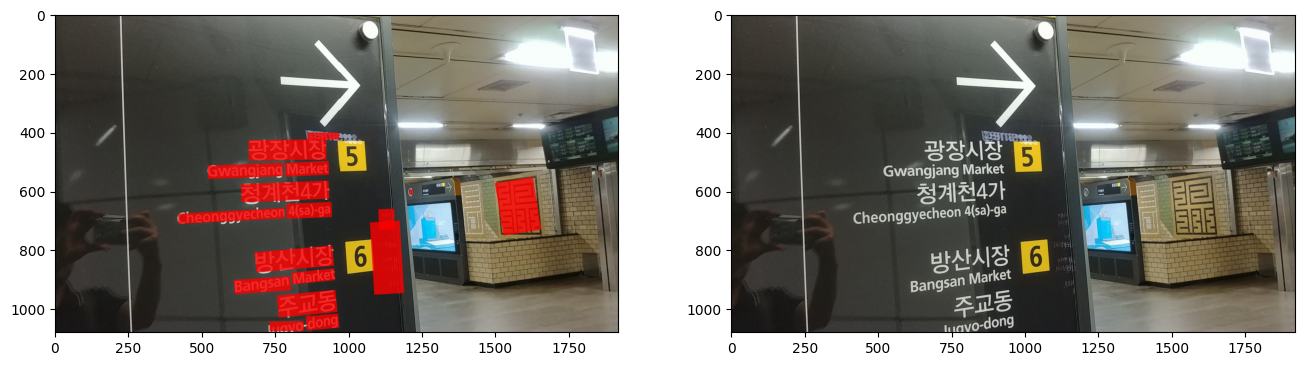

In [55]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from mmocr.apis import TextDetInferencer

img = '/content/temp-sign/kaggle_ko_sign/Temp/temp_Sign/00BC7EFF313A80D265D56268ACC77055.jpg'
checkpoint = '/content/work_dirs/test/epoch_10.pth'
cfg_file = '/content/mmocr/configs/textdet/dbnet/dbnet_resnet50-dcnv2_fpnc_1200e_icdar2015.py'

infer = TextDetInferencer(cfg_file, checkpoint)
result = infer(img, return_vis=True)

print(f'result: {result["predictions"]}' )
ex = [round(x) for x in result["predictions"][0]["polygons"][0]]
print(f'result: {ex}')

fig, ax = plt.subplots(1,2,figsize=(16,10))
ax[0].imshow(result['visualization'][0])
img = cv2.imread(img)
ax[1].imshow(np.asarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.show()